# World University Ranking

Investigate the best universities in the world

In [297]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import geopandas as gpd

# Some magic that tells jupyter to put graphs and things in the notebook 
# instead of the default behaviour which is to save it as a file.
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# give us a style state to go back to
saved_style_state = matplotlib.rcParams.copy()

In [2]:
if os.path.isfile("timesData.csv"):
    filepath = "timesData.csv"
    print "loading from file"
else:
    filepath = "https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/timesData.csv"
    print "loading from the Internet"
wur_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [3]:
wur_data.head()
# get data info
wur_data.info()
# have a look at row
wur_data.ix[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


world_rank                                                 2
university_name           California Institute of Technology
country                             United States of America
teaching                                                97.7
international                                           54.6
research                                                  98
citations                                               99.9
income                                                  83.7
total_score                                             96.0
num_students                                           2,243
student_staff_ratio                                      6.9
international_students                                   27%
female_male_ratio                                    33 : 67
year                                                    2011
Name: 1, dtype: object

In [4]:
# zip dtype with row_1 (and then change number type from string to integer or float)
dtype = zip([type(x) for x in wur_data.ix[1]], wur_data.ix[1], wur_data.ix[1].keys())
dtype

[(str, '2', 'world_rank'),
 (str, 'California Institute of Technology', 'university_name'),
 (str, 'United States of America', 'country'),
 (numpy.float64, 97.700000000000003, 'teaching'),
 (str, '54.6', 'international'),
 (numpy.float64, 98.0, 'research'),
 (numpy.float64, 99.900000000000006, 'citations'),
 (str, '83.7', 'income'),
 (str, '96.0', 'total_score'),
 (str, '2,243', 'num_students'),
 (numpy.float64, 6.9000000000000004, 'student_staff_ratio'),
 (str, '27%', 'international_students'),
 (str, '33 : 67', 'female_male_ratio'),
 (numpy.int64, 2011, 'year')]

In [5]:
# some world_rank values contain '-' and '=' and some world ranks correspond to more than 6 universities.
# drop rows based on column value which contains '-'
wur_data = wur_data[wur_data['world_rank'].str.contains('-') == False]
# replace '=' with ''
wur_data['world_rank'] = wur_data['world_rank'].apply(lambda x: re.sub('=', '', x))
# change data type from string to integer
wur_data['world_rank'] = wur_data['world_rank'].apply(int)
wur_data['world_rank']

0         1
1         2
2         3
3         4
4         5
5         6
6         6
7         8
8         9
9        10
10       11
11       12
12       13
13       14
14       15
15       15
16       17
17       18
18       19
19       20
20       21
21       22
22       23
23       24
24       25
25       26
26       27
27       28
28       29
29       30
       ... 
1973    167
1974    172
1975    172
1976    174
1977    175
1978    176
1979    176
1980    178
1981    179
1982    180
1983    180
1984    182
1985    182
1986    182
1987    185
1988    185
1989    185
1990    188
1991    189
1992    190
1993    190
1994    192
1995    193
1996    193
1997    195
1998    196
1999    196
2000    198
2001    199
2002    200
Name: world_rank, dtype: int64

In [6]:
# international, income and total_score just need to change data type from string to float
# international
boo_international = wur_data['international'].str.contains('-') == False
wur_data['international'] = wur_data['international'][boo_international].apply(float)
# income has NAN values
boo1_income = wur_data['income'].isnull() == False
boo2_income = wur_data['income'] != '-'
wur_data['income'] = wur_data['income'][boo1_income][boo2_income].apply(float)
# total_score
wur_data['total_score'] = wur_data['total_score'].apply(float)

In [7]:
# num_students
boo_num_students = wur_data['num_students'].isnull() == False
wur_data['num_students'] = wur_data['num_students'][boo_num_students].apply(lambda x: re.sub(',', '', x)).apply(float)
wur_data['num_students']

0       20152.0
1        2243.0
2       11074.0
3       15596.0
4        7929.0
5       18812.0
6       19919.0
7       36186.0
8       15060.0
9       11751.0
10      38206.0
11      14221.0
12      15128.0
13      21424.0
14      18178.0
15      41786.0
16      66198.0
17      25055.0
18      20376.0
19      11885.0
20      19835.0
21      26607.0
22      44020.0
23      15172.0
24      18334.0
25      26199.0
26      19967.0
27       3055.0
28      22020.0
29      50152.0
         ...   
1973    28856.0
1974    12938.0
1975    29787.0
1976    47491.0
1977    10930.0
1978     8176.0
1979    22193.0
1980    17612.0
1981    30726.0
1982    26420.0
1983      769.0
1984    11623.0
1985    23347.0
1986    25674.0
1987     5495.0
1988    11628.0
1989    26576.0
1990    27603.0
1991    83236.0
1992    12346.0
1993    13216.0
1994     9187.0
1995     5144.0
1996    50657.0
1997     6853.0
1998    20174.0
1999     2958.0
2000    16841.0
2001    27756.0
2002    17940.0
Name: num_students, dtyp

In [8]:
# convert a string percentage to a float
wur_data['international_students'] = wur_data['international_students'].str.strip('%').apply(float)
wur_data['international_students'] = [x/100 for x in wur_data['international_students']]
wur_data['international_students'] 

0       0.25
1       0.27
2       0.33
3       0.22
4       0.27
5       0.34
6       0.34
7       0.15
8       0.51
9       0.20
10      0.15
11      0.21
12      0.23
13      0.19
14      0.37
15      0.16
16      0.15
17      0.28
18      0.20
19      0.35
20      0.38
21      0.46
22      0.13
23      0.17
24      0.15
25      0.10
26      0.26
27      0.04
28      0.11
29      0.25
        ... 
1973    0.19
1974    0.33
1975    0.28
1976    0.10
1977    0.12
1978    0.14
1979    0.23
1980    0.05
1981    0.14
1982    0.12
1983    0.17
1984    0.12
1985    0.23
1986    0.09
1987    0.22
1988    0.25
1989    0.08
1990    0.17
1991    0.09
1992    0.16
1993    0.19
1994    0.10
1995    0.52
1996    0.09
1997    0.16
1998    0.29
1999    0.17
2000    0.08
2001    0.17
2002    0.30
Name: international_students, dtype: float64

In [9]:
# convert female_male_ratio to a float
x = wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False].str[:2].apply(float)
y = wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False].str[4:].apply(float)
wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False] = [m/n for m, n in zip(x, y)]
wur_data['female_male_ratio']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0            NaN
1       0.492537
2       0.587302
3       0.724138
4       0.818182
5       0.851852
6       0.851852
7              1
8       0.587302
9              1
10       1.08333
11      0.724138
12             1
13      0.923077
14      0.449275
15      0.923077
16           NaN
17           NaN
18       1.04082
19      0.639344
20       1.12766
21       1.27273
22       1.12766
23      0.960784
24      0.923077
25           NaN
26      0.449275
27          0.25
28       1.08333
29       1.17391
          ...   
1973     1.17391
1974     1.17391
1975     1.17391
1976     1.63158
1977     1.17391
1978    0.234568
1979         NaN
1980     1.22222
1981    0.818182
1982         NaN
1983    0.538462
1984         1.5
1985     1.32558
1986    0.818182
1987     1.22222
1988         1.5
1989     1.32558
1990         NaN
1991           1
1992     1.27273
1993     1.17391
1994    0.886792
1995           1
1996    0.886792
1997     1.77778
1998           1
1999      1.5641
2000     1.040

In [10]:
wur_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011


In [11]:
wur_data.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
count,1201.000000,1201.000000,1192.000000,1201.000000,1201.000000,1061.000000,1201.000000,1182.000000,1182.000000,1181.000000,1201.000000
mean,100.233972,50.730808,59.478523,52.252040,76.928726,54.230914,59.846128,23891.501692,15.932318,0.196274,2013.501249
std,57.634735,16.912699,21.209330,19.661541,15.535493,22.722593,12.803446,13635.554030,9.437269,0.101746,1.708374
min,1.000000,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,0.010000,2011.000000
25%,50.000000,38.300000,42.175000,37.100000,66.700000,36.300000,50.300000,14221.000000,10.200000,0.120000,2012.000000
50%,100.000000,47.500000,59.500000,48.500000,78.800000,45.800000,56.000000,22616.000000,14.700000,0.180000,2014.000000
75%,150.000000,60.200000,77.700000,64.700000,89.200000,68.200000,66.200000,31326.000000,18.700000,0.260000,2015.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,127431.000000,85.800000,0.540000,2016.000000


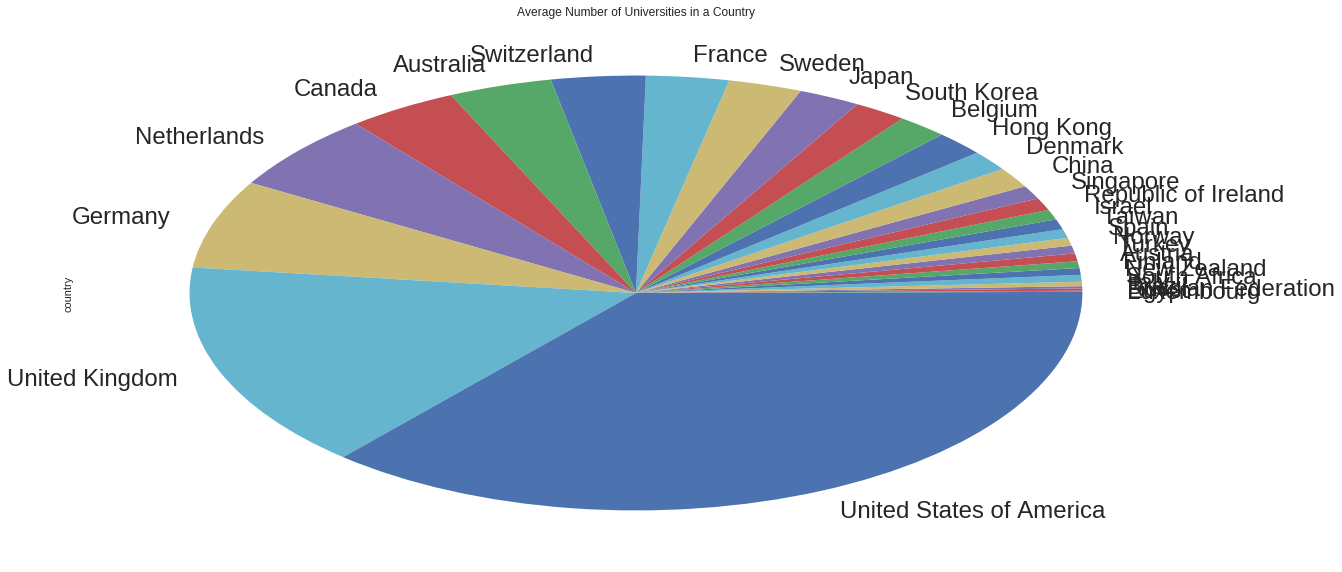

In [241]:
# average number of universities in a country across 6 years
num_years = abs(wur_data['year'].ix[0] - wur_data['year'].iloc[-1])
country_uni = wur_data['country'].value_counts()/num_years
title = 'Average Number of Universities in a Country'
country_uni.sort_values(ascending = True).plot(kind = 'pie', title = title, fontsize = 24)
len(country_uni)
old_index = country_uni.sort_index().index

In [242]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
world['name']

0                 Afghanistan
1                      Angola
2                     Albania
3        United Arab Emirates
4                   Argentina
5                     Armenia
6                  Antarctica
7      Fr. S. Antarctic Lands
8                   Australia
9                     Austria
10                 Azerbaijan
11                    Burundi
12                    Belgium
13                      Benin
14               Burkina Faso
15                 Bangladesh
16                   Bulgaria
17                    Bahamas
18           Bosnia and Herz.
19                    Belarus
20                     Belize
21                    Bolivia
22                     Brazil
23                     Brunei
24                     Bhutan
25                   Botswana
26       Central African Rep.
27                     Canada
28                Switzerland
29                      Chile
                ...          
147                    Serbia
148                  Suriname
149       

In [243]:
country_uni = country_uni.rename(index = {'United States of America': 'United States', 'South Korea': 'Korea', 'Republic of Ireland': 'Ireland', 'Russian Federation': 'Russia', })
country_uni['China'] = country_uni['China'] + country_uni['Hong Kong']
del country_uni['Hong Kong']
country_uni

United States     87.4
United Kingdom    37.2
Germany           15.8
Netherlands       13.8
Canada             9.6
Australia          9.0
Switzerland        8.2
France             7.2
Sweden             6.4
Japan              5.4
Korea              4.6
Belgium            4.4
China              8.0
Denmark            3.6
Singapore          2.4
Ireland            2.2
Israel             1.8
Taiwan             1.8
Spain              1.6
Norway             1.4
Turkey             1.4
Austria            1.4
Finland            1.2
New Zealand        1.2
South Africa       1.2
Italy              0.8
Brazil             0.4
Russia             0.4
Egypt              0.2
Luxembourg         0.2
Name: country, dtype: float64

In [244]:
country_uni = country_uni.reindex(world['name'], fill_value = 0)
country_uni

name
Afghanistan                0.0
Angola                     0.0
Albania                    0.0
United Arab Emirates       0.0
Argentina                  0.0
Armenia                    0.0
Antarctica                 0.0
Fr. S. Antarctic Lands     0.0
Australia                  9.0
Austria                    1.4
Azerbaijan                 0.0
Burundi                    0.0
Belgium                    4.4
Benin                      0.0
Burkina Faso               0.0
Bangladesh                 0.0
Bulgaria                   0.0
Bahamas                    0.0
Bosnia and Herz.           0.0
Belarus                    0.0
Belize                     0.0
Bolivia                    0.0
Brazil                     0.4
Brunei                     0.0
Bhutan                     0.0
Botswana                   0.0
Central African Rep.       0.0
Canada                     9.6
Switzerland                8.2
Chile                      0.0
                          ... 
Serbia                     0.0
Sur

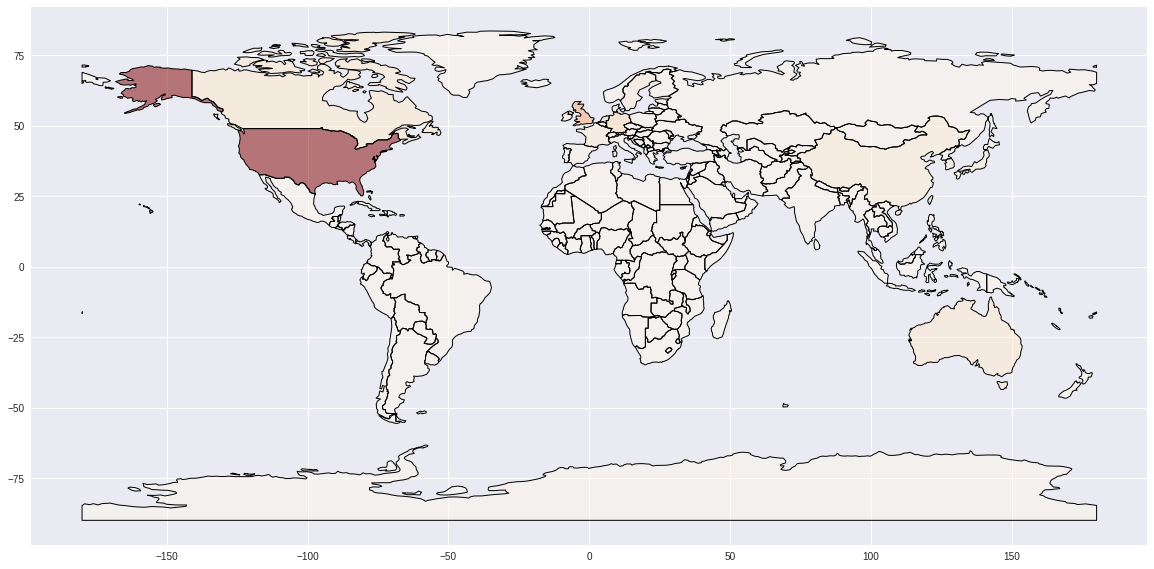

In [302]:
world['uni_per_country'] = country_uni.values
world.plot(column = 'uni_per_country', cmap = 'OrRd')

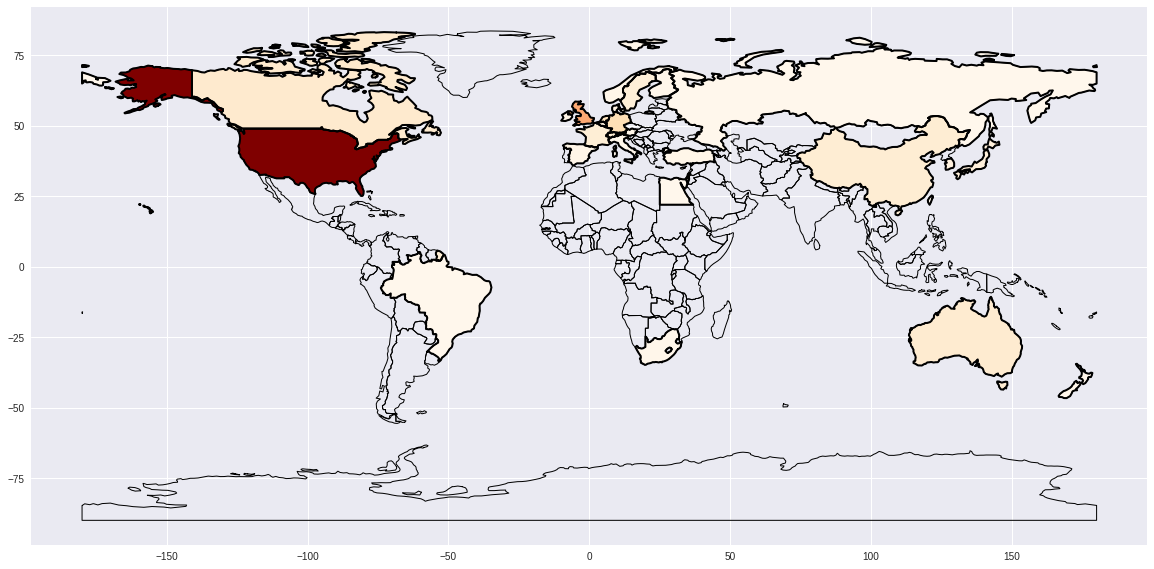

In [303]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', alpha=0)
world_uni.plot(column = 'uni_per_country',ax=ax, cmap='OrRd', edgecolor='black', linewidth=2, alpha=1)
plt.show();

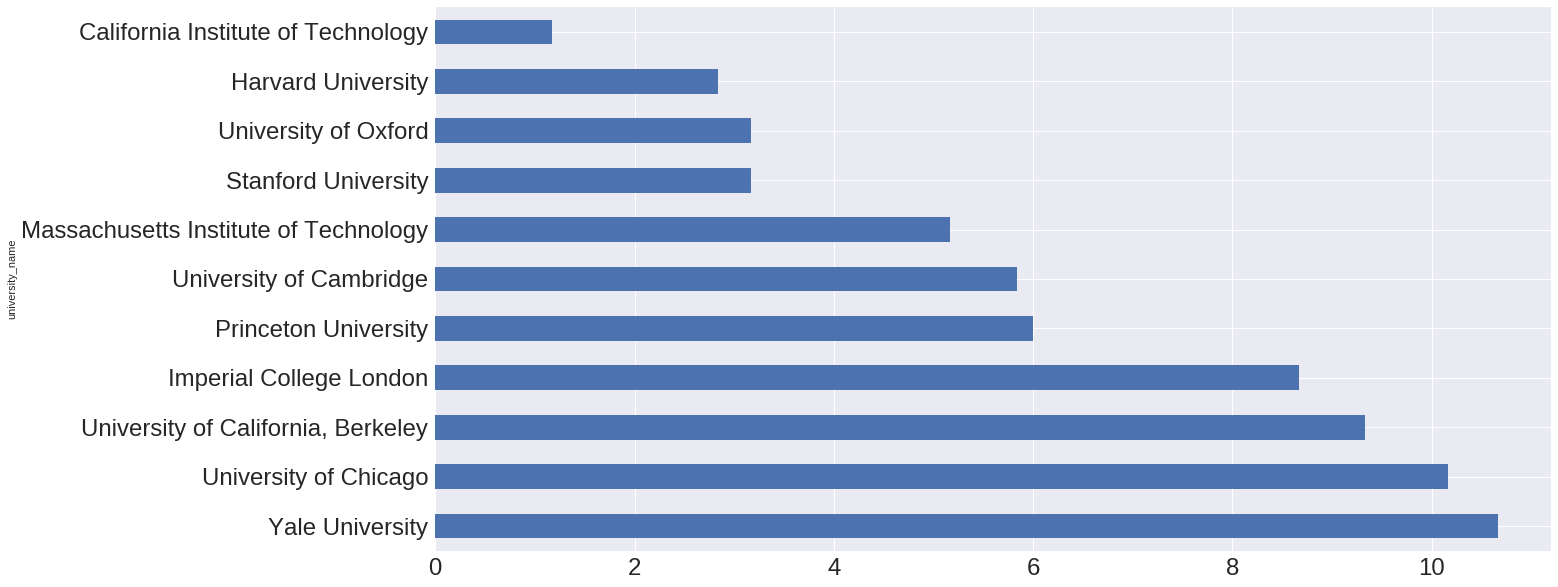

In [168]:
p_wr = wur_data.pivot_table(index = 'university_name', values = 'world_rank', aggfunc = np.mean)
p_wr.sort_values(ascending = False)[p_wr < 11].plot(kind = 'barh', fontsize = 24)

In [160]:
def hist(data, column):
    # draw a histgram
    plt.hist(data[column].dropna(), bins = 100, normed = 1, facecolor='blue', alpha=0.75)
    plt.xlabel(column.title(), fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
    plt.title('{} Distribution'.format(column).title(), fontsize = 36)
    plt.grid(True)
    plt.show()

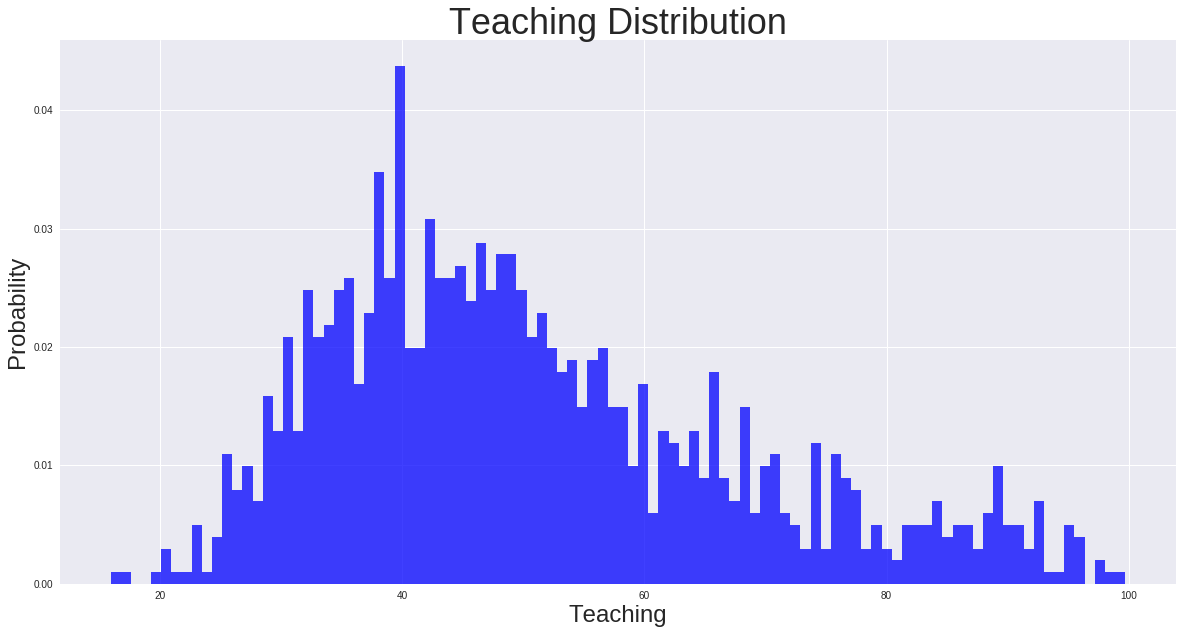

In [138]:
hist(wur_data, 'teaching')

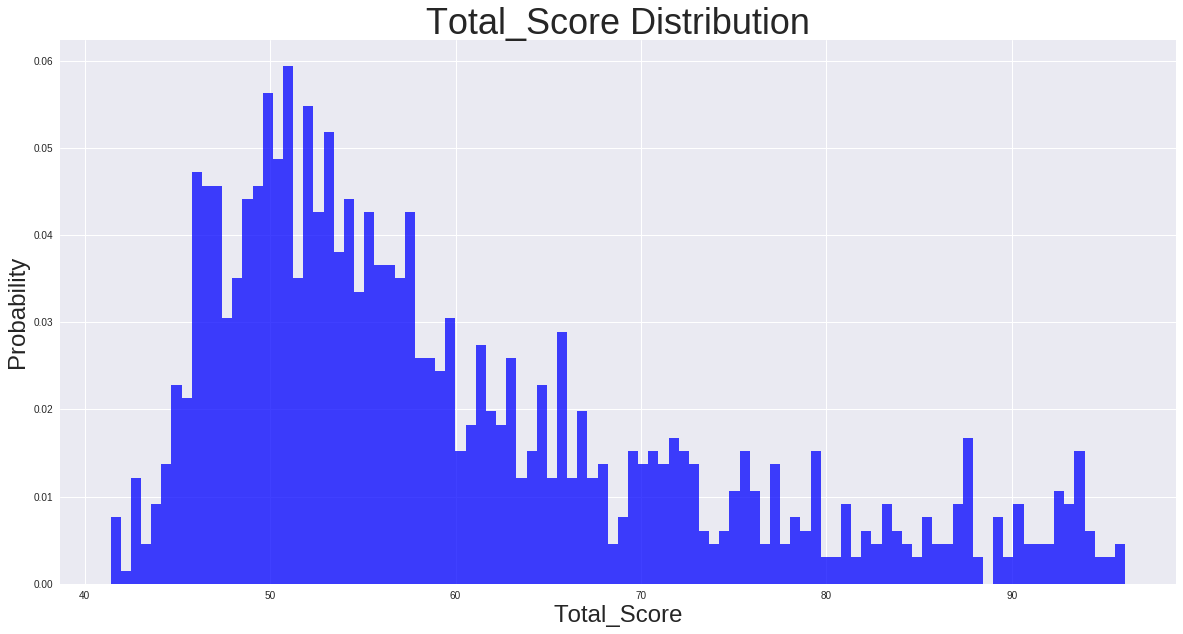

In [144]:
hist(wur_data, 'total_score')

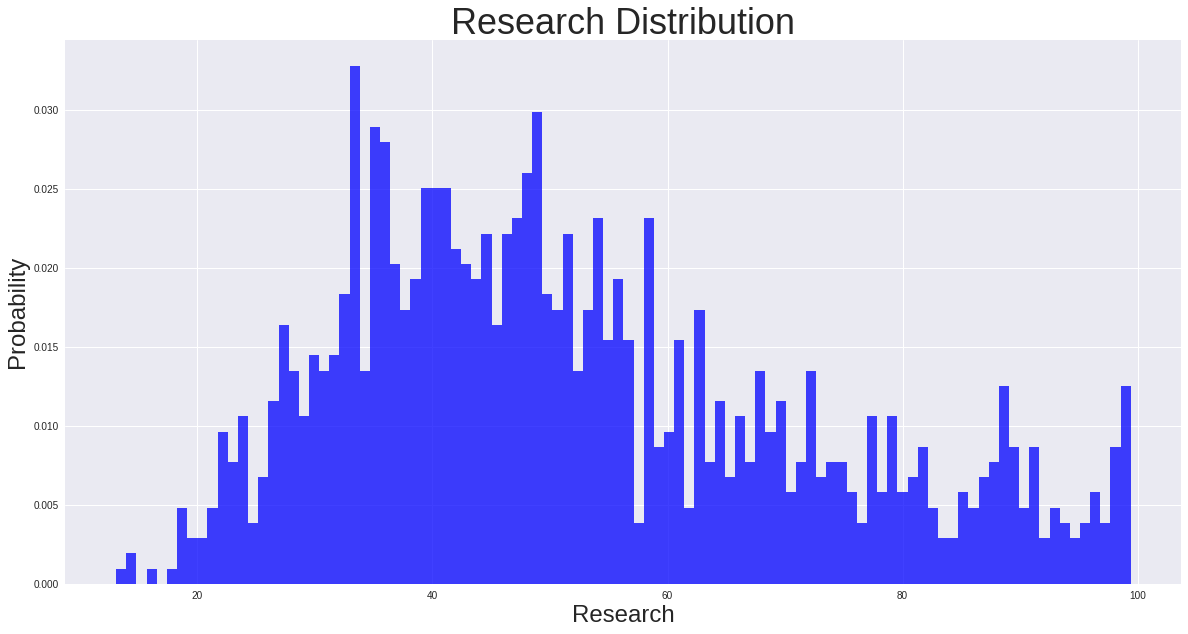

In [140]:
hist(wur_data, 'research')

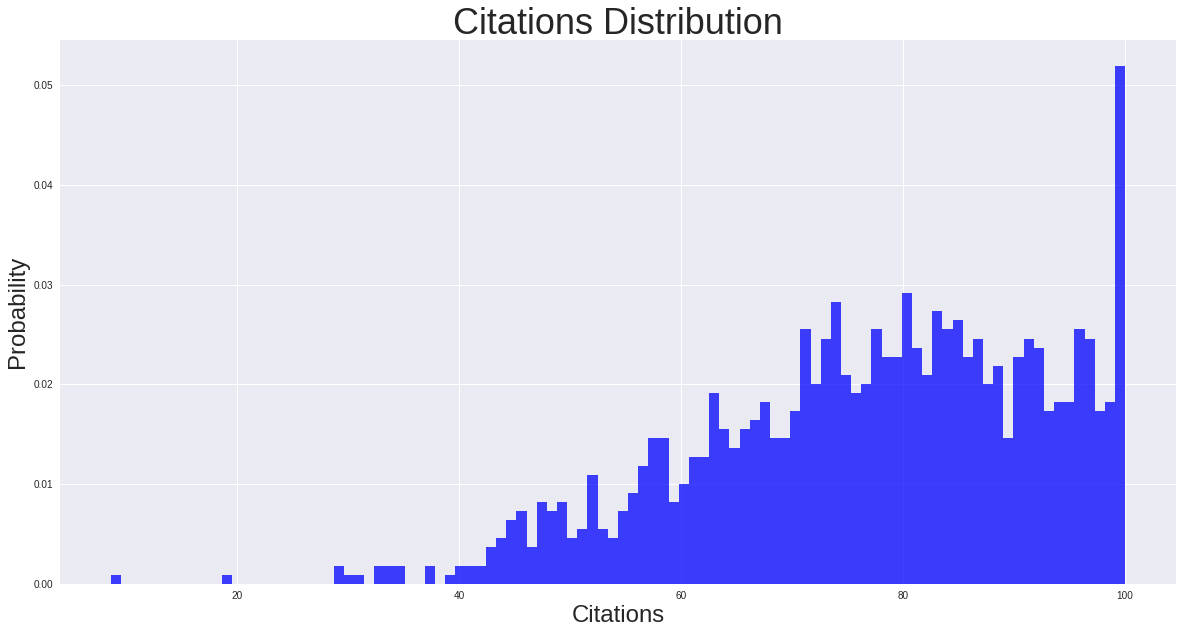

In [142]:
hist(wur_data, 'citations')

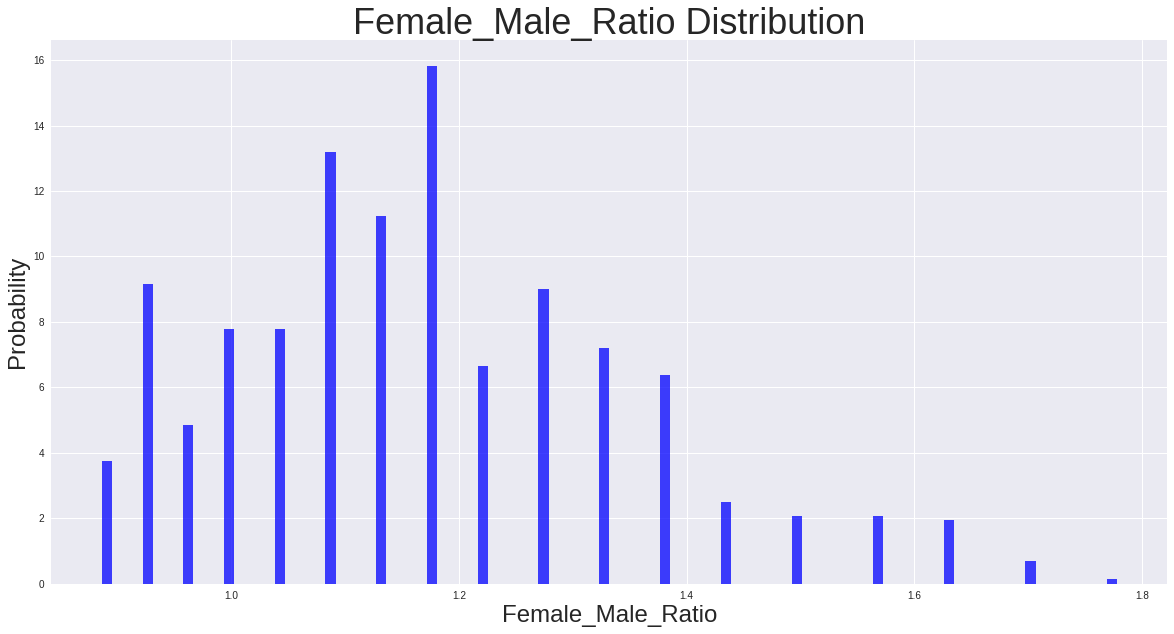

In [147]:
hist(wur_data, 'female_male_ratio')

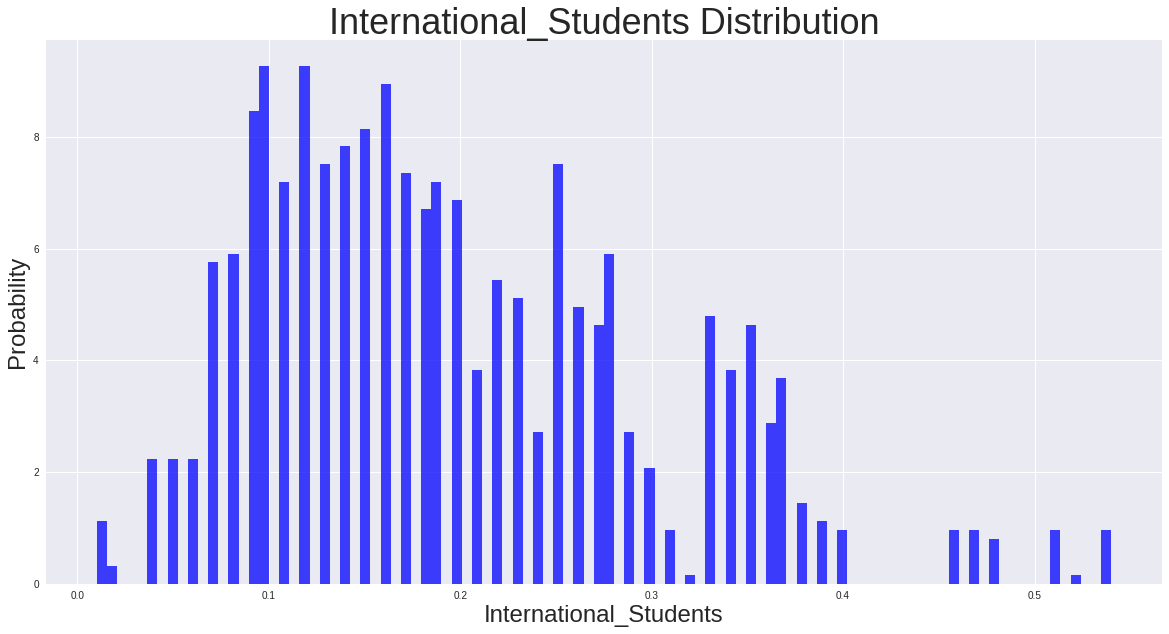

In [162]:
hist(wur_data, 'international_students')

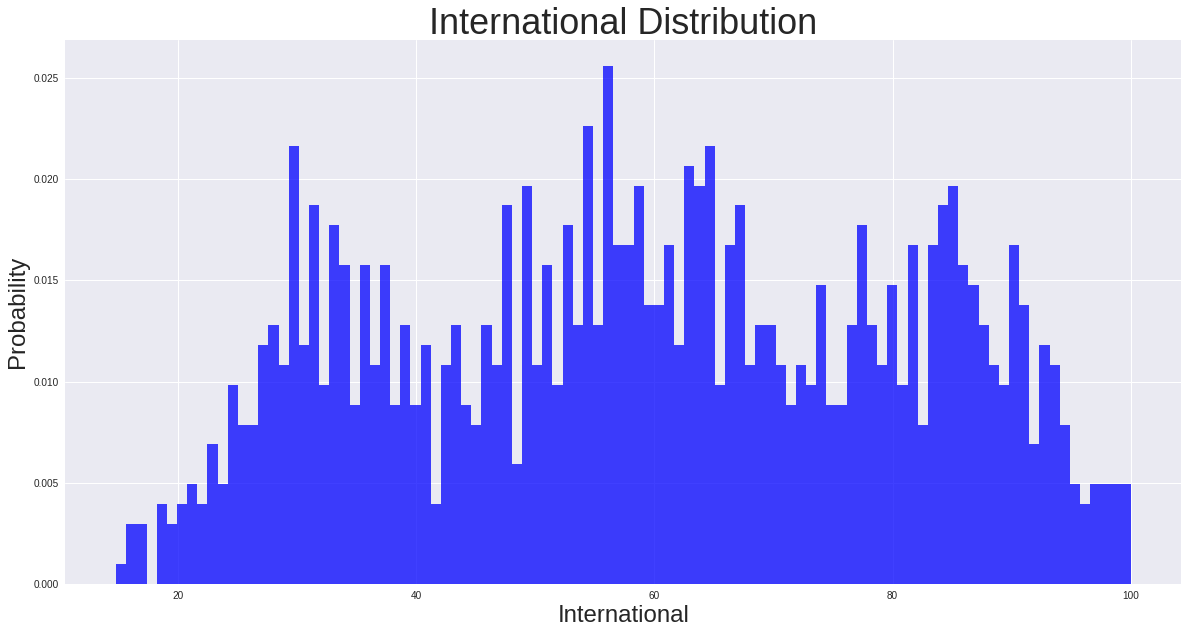

In [163]:
hist(wur_data, 'international')

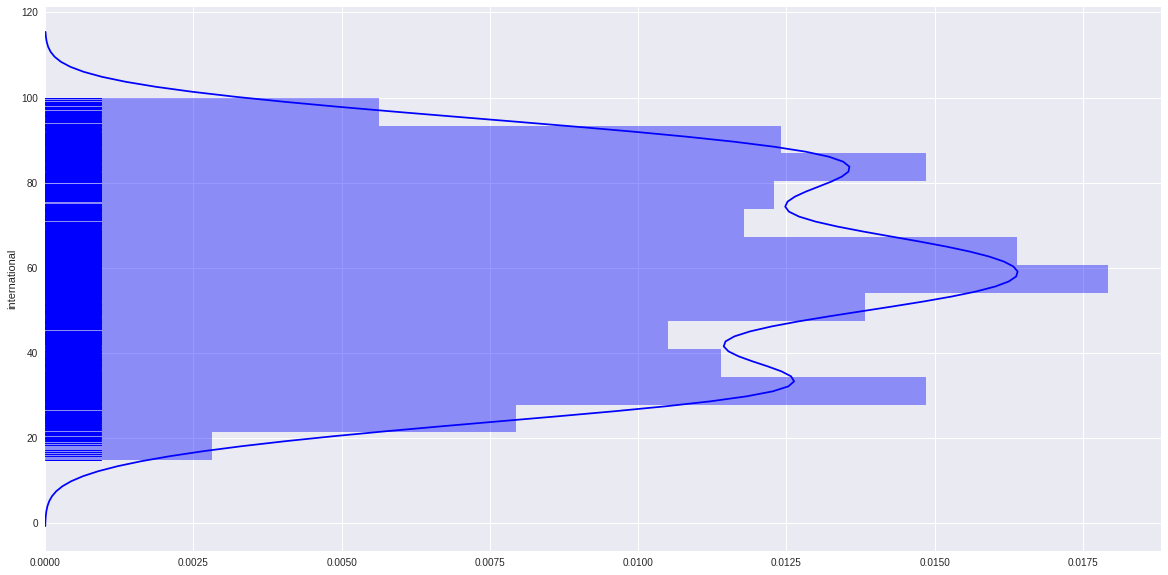

In [38]:
sns.distplot(wur_data['international'].dropna(), hist = True, kde = True, rug = True, vertical = True, color = 'blue')
sns.plt.show()

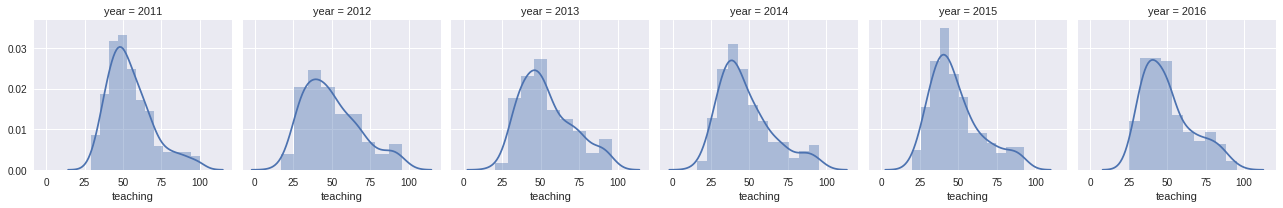

In [172]:
g = sns.FacetGrid(wur_data, col='year')
g.map(sns.distplot, "teaching")
sns.plt.show()

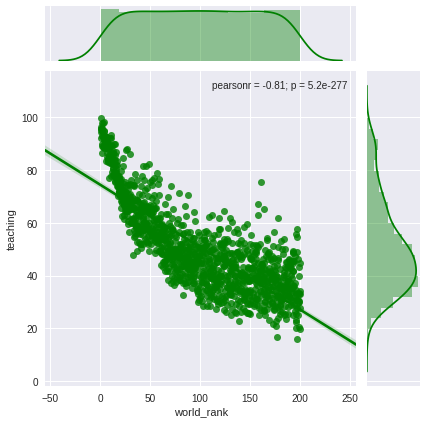

In [47]:
sns.jointplot(data=wur_data, x='world_rank', y='teaching', kind='reg', color='g')
sns.plt.show()

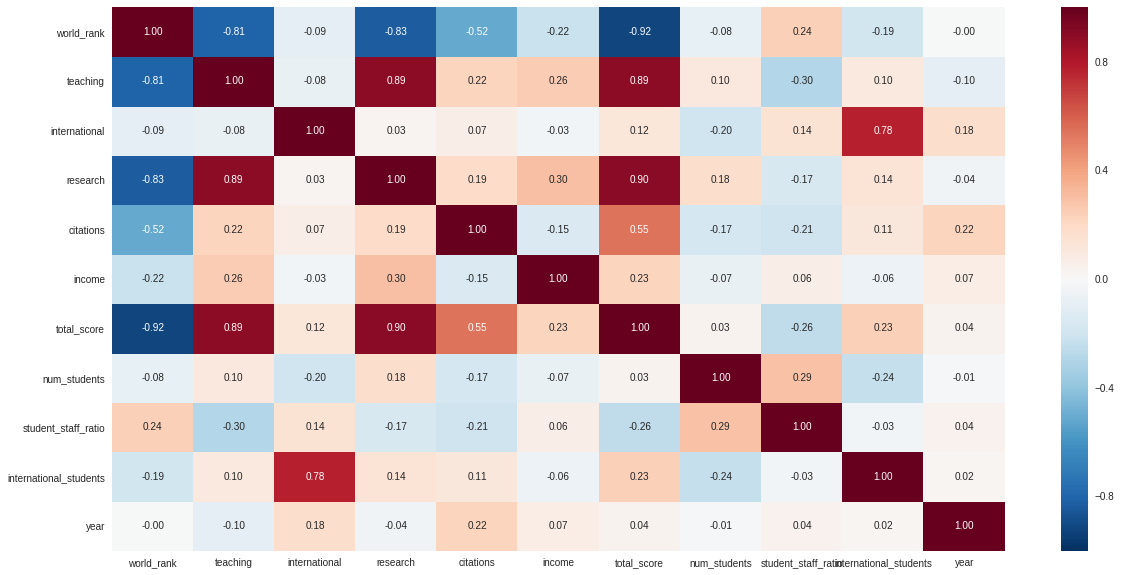

In [48]:
sns.heatmap(wur_data.corr(), annot=True, fmt=".2f")

ValueError: need more than 1 value to unpack

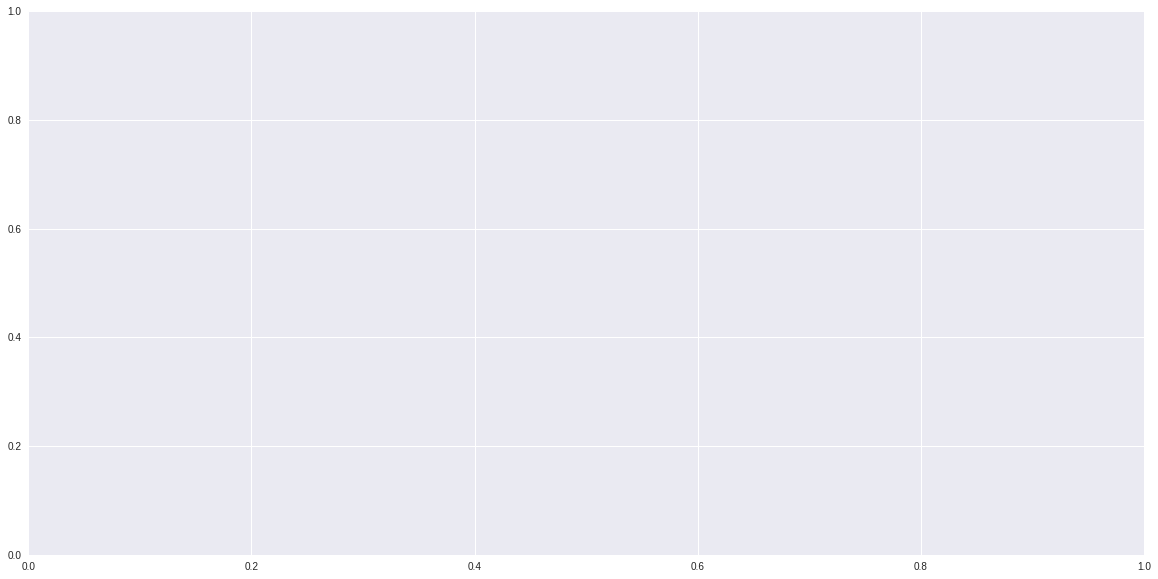

In [170]:
df = wur_data.pivot_table(index='world_rank', values='teaching', aggfunc=np.mean)
sns.heatmap(df, annot=True, fmt=".1f")

In [40]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd